# INTRO TO NLP 

In [1]:
!pip install wordcloud

In [2]:
!pip install textblob

In [3]:
!pip install gensim

## Data Cleaning

## Problem Statement

Our goal is to look at transcripts of various comedians and note their similarities and differences. Specifically, we would like to know if Ali Wong's comedy style is different than other comedians.

## Getting The Data

In [4]:
# Web scraping, pickle imports
import requests
from bs4 import BeautifulSoup
import pickle

# Scrapes transcript data from scrapsfromtheloft.com
def url_to_transcript(url):
    '''Returns transcript data specifically from scrapsfromtheloft.com.'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find(class_="post-content").find_all('p')]
    print(url)
    return text

# URLs of transcripts in scope
urls = ['http://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/',
        'http://scrapsfromtheloft.com/2017/08/07/bo-burnham-2013-full-transcript/',
        'http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2017/10/21/hasan-minhaj-homecoming-king-2017-full-transcript/',
        'http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-2016-full-transcript/']

# Comedian names
comedians = ['louis', 'dave', 'ricky', 'bo', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe']

In [5]:
# Load pickled files
data = {}
for i, c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [6]:
# Double check to make sure data has been loaded properly
data.keys()

dict_keys(['louis', 'dave', 'ricky', 'bo', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe'])

In [7]:
# More checks
data['louis'][:2]

['Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily agree with you, but I appreciate very much. Well, this is a nice place. This is easily the nicest place For many miles in every direction. That’s how you compliment a building And shit on a town with one sentence. It is odd around here, as I was driving here. There doesn’t seem to be any difference Between the sidewalk and the street for pedestrians here. People just kind of walk in the middle of the road. I love traveling And seeing all the different parts of the country. I live in New York. I live in a– There’s no value to your doing that at all.',
 '“The Old Lady And The Dog”\nI live– I live in New York. I always– Like, there’s this old lady in my neighborhood, And she’s always walking her dog. She’s always just– she’s very old. She just stands there just being old, And the dog just fights gravity every day, just– The two of them, it’s re

## Cleaning The Data

In [8]:
# Let's take a look at our data again
next(iter(data.keys()))

'louis'

In [9]:
# Notice that our dictionary is currently in key: comedian, value: list of text format
next(iter(data.values()))

['Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily agree with you, but I appreciate very much. Well, this is a nice place. This is easily the nicest place For many miles in every direction. That’s how you compliment a building And shit on a town with one sentence. It is odd around here, as I was driving here. There doesn’t seem to be any difference Between the sidewalk and the street for pedestrians here. People just kind of walk in the middle of the road. I love traveling And seeing all the different parts of the country. I live in New York. I live in a– There’s no value to your doing that at all.',
 '“The Old Lady And The Dog”\nI live– I live in New York. I always– Like, there’s this old lady in my neighborhood, And she’s always walking her dog. She’s always just– she’s very old. She just stands there just being old, And the dog just fights gravity every day, just– The two of them, it’s re

In [10]:
# We are going to change this to key: comedian, value: string format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [11]:
# Combine it!
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [12]:
# We can either keep it in dictionary format or put it into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ..."
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s..."
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ..."
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ..."
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa..."
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello..."
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ..."
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo..."
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...


In [13]:
# Let's take a look at the transcript for Ali Wong
data_df.transcript.loc['ali']

"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through.\nAnd then, when they go to sleep, they just go to 

Apply a round of text cleaning techniques:

1) Make text lowercase

2) Remove text in square brackets

3) Remove punctuation

4) Remove words containing numbers

5) Remove additional punctuations and non-sensical text, for example the "\n"

In [14]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.
        Return the cleaned text.'''
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text) #[[]\w+\s+\w+[]]
    text = re.sub(r'[^\w+\s+]', '', text)
    text = re.sub(r'\w*\d+\w*', '', text)
    text = re.sub(r'[\n\r]', '', text)
    return text
   

In [15]:
# Apply your clean_text function to your data and take a look at the updated text
clean_text(data_df.transcript.loc['ali'])

'ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get this shit over with cause i have to pee in like ten minutes but thank you everybody so much for coming um its a very exciting day for me its been a very exciting year for me i turned  this year yes thank you five people i appreciate that uh i can tell that im getting older because now when i see an  girl my automatic thought is fuck you fuck you i dont even know you but fuck you cause im straight up jealous im jealous first and foremost of their metabolism because  girls they could just eat like shit and then they take a shit and have a sixpack right they got thatthat beautiful inner thigh clearance where they put their feet together and theres that huge gap here with the light of potential just radiating throughand then when they go to sleep they just go to sleep right they dont have insomnia yet they dont know what its like to have to take a 

In [16]:
# Save your cleaned dataset to the variable data_clean
data_clean = data_df['transcript'].map(clean_text).to_frame()

## Organizing The Data

### Corpus

In [17]:
# Let's take a look at our dataframe
data_df

,transcript
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ..."
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s..."
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ..."
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ..."
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa..."
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello..."
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ..."
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo..."
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...


In [18]:
# Let's add the comedians' full names as well
full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

data_df['full_name'] = full_names
data_df

,transcript,full_name
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ...",Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s...",Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",Bill Burr
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...,Bo Burnham
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",Dave Chappelle
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa...",Hasan Minhaj
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello...",Jim Jefferies
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ...",Joe Rogan
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo...",John Mulaney
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...,Louis C.K.


In [19]:
# Let's pickle it for later use
data_df.to_pickle("corpus.pkl")

### Document-Term Matrix

In [20]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

#Use CountVectorizer
cv = CountVectorizer(stop_words='english')

#Fit Transform the transcript column of the cleaned data
data_cv = cv.fit_transform(data_clean['transcript'])

#Make the document-term matrix dataframe from data_cv
column_names = cv.get_feature_names()
data_dtm = pd.DataFrame(data = data_cv.toarray(), columns = column_names)
data_dtm.index = data_clean.index
data_dtm

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,abcs,ability,abject,...,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,1,1,1,0,0
bo,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,...,2,1,0,1,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,0,0,3,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


In [21]:
# Let's pickle it for later use
data_dtm.to_pickle("dtm.pkl")

In [22]:
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

## EDA

## Most Common Words

In [23]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0


Find the top 30 words said by each comedian and return it in the form of the dictionary with the word and its count.

In [24]:
top_words = {}
for name in data.columns:
    top_words[name] = data[name].sort_values(ascending=False)[:30]

Print the top 15 words said by each comedian

In [25]:
for name in top_words:
    print(name + ": " + repr(list(top_words[name].index[:15])) + '\n')

ali: ['like', 'im', 'know', 'just', 'dont', 'thats', 'shit', 'youre', 'gonna', 'ok', 'lot', 'wanna', 'gotta', 'oh', 'husband']

anthony: ['im', 'like', 'know', 'dont', 'joke', 'got', 'thats', 'said', 'anthony', 'just', 'say', 'day', 'guys', 'people', 'youre']

bill: ['like', 'just', 'right', 'im', 'know', 'dont', 'gonna', 'got', 'fucking', 'yeah', 'shit', 'youre', 'thats', 'dude', 'fuck']

bo: ['know', 'like', 'love', 'im', 'think', 'bo', 'just', 'stuff', 'repeat', 'dont', 'yeah', 'want', 'right', 'cos', 'said']

dave: ['like', 'know', 'said', 'just', 'im', 'shit', 'people', 'didnt', 'ahah', 'dont', 'time', 'thats', 'fuck', 'fucking', 'black']

hasan: ['like', 'im', 'know', 'dont', 'dad', 'youre', 'just', 'going', 'thats', 'want', 'got', 'love', 'shes', 'hasan', 'right']

jim: ['like', 'im', 'dont', 'right', 'fucking', 'just', 'went', 'know', 'youre', 'people', 'thats', 'day', 'oh', 'think', 'going']

joe: ['like', 'people', 'just', 'dont', 'fucking', 'im', 'fuck', 'thats', 'gonna', 't

In [26]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian and return it in a list.
words = []

for lst in top_words.values():
    words.extend(lst.index)

In [27]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('just', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 11),
 ('got', 10),
 ('gonna', 8),
 ('time', 8),
 ('think', 8),
 ('oh', 7),
 ('yeah', 7),
 ('said', 7),
 ('cause', 6),
 ('hes', 6),
 ('say', 6),
 ('fucking', 6),
 ('shit', 5),
 ('day', 5),
 ('thing', 5),
 ('good', 5),
 ('fuck', 5),
 ('want', 5),
 ('didnt', 5),
 ('going', 5),
 ('theyre', 5),
 ('theres', 5),
 ('really', 5),
 ('did', 4),
 ('little', 4),
 ('dude', 3),
 ('guys', 3),
 ('ive', 3),
 ('man', 3),
 ('life', 3),
 ('went', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('joke', 2),
 ('guy', 2),
 ('make', 2),
 ('come', 2),
 ('love', 2),
 ('dad', 2),
 ('mom', 2),
 ('hey', 2),
 ('white', 2),
 ('goes', 2),
 ('kids', 2),
 ('real', 2),
 ('old', 2),
 ('mean', 2),
 ('id', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('god', 1),
 ('need', 1),
 ('work', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('school', 1),
 ('jokes', 1),
 ('o

In [28]:
# If more than half of the comedians have it as a top word, exclude it from the list
for tup in Counter(words).most_common():
    if tup[1] <= len(data.columns) / 2:
        while tup[0] in words:
            words.remove(tup[0])
words = list(pd.Series(words).unique())
words

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'youre',
 'gonna',
 'oh',
 'time',
 'got',
 'right',
 'people',
 'yeah',
 'said',
 'think']

In [29]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data (data_clean.pkl)
clean_data = pd.read_pickle('data_clean.pkl')

# Add new stop words 
stop_words = text.ENGLISH_STOP_WORDS.union(words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words = stop_words) #use countvectorizer
data_cv = cv.fit_transform(clean_data['transcript']) #fit transform
data_stop = pd.DataFrame(data = data_cv.toarray(), columns = cv.get_feature_names(), index = data_clean.index) #make df

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [30]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

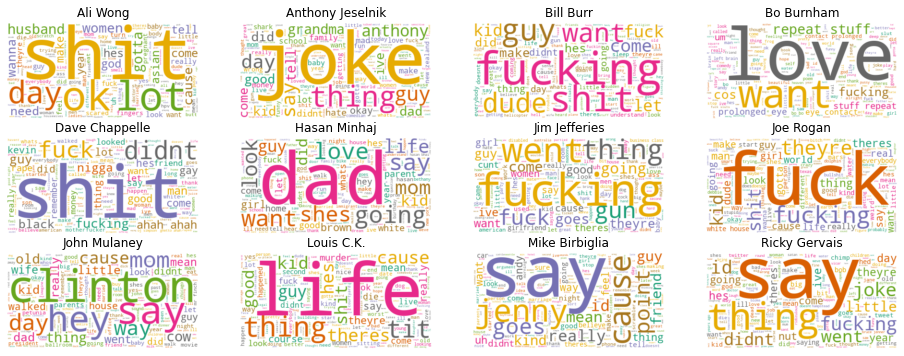

In [31]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

# Create subplots for each comedian

for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

## Number of Words

In [32]:
# Find the number of unique words that each comedian uses
num_unique = {}
for comedian in data:
    num_unique[comedian] = len(data[data[comedian] > 0])
    
# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_words = {}
for comedian in data:
    unique_words[comedian] = list(data[data[comedian] > 0][comedian].index)
    
# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(data=num_unique, index=['count']).transpose()
data_words

,count
ali,1341
anthony,984
bill,1633
bo,1272
dave,1404
hasan,1559
jim,1313
joe,1435
john,1391
louis,1104


In [33]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses and add it to total_list
total_list = []
for comedian in clean_data.index:
    total_list.append(len(clean_data.loc[comedian, 'transcript'].split(" ")))

# Comedy special run times from IMDB, in minutes
run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79]

# Let's add some columns to our dataframe
data_words['unique_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['unique_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_unique_sort = data_words.sort_values(by='words_per_minute', ascending=False)
data_unique_sort

,count,unique_words,run_times,words_per_minute
joe,1435,9923,63,157.507937
bill,1633,12181,80,152.262500
mike,1494,11439,76,150.513158
john,1391,9298,62,149.967742
jim,1313,11012,77,143.012987
hasan,1559,10405,73,142.534247
dave,1404,9145,67,136.492537
ricky,1633,10526,79,133.240506
louis,1104,7468,58,128.758621
ali,1341,7357,60,122.616667


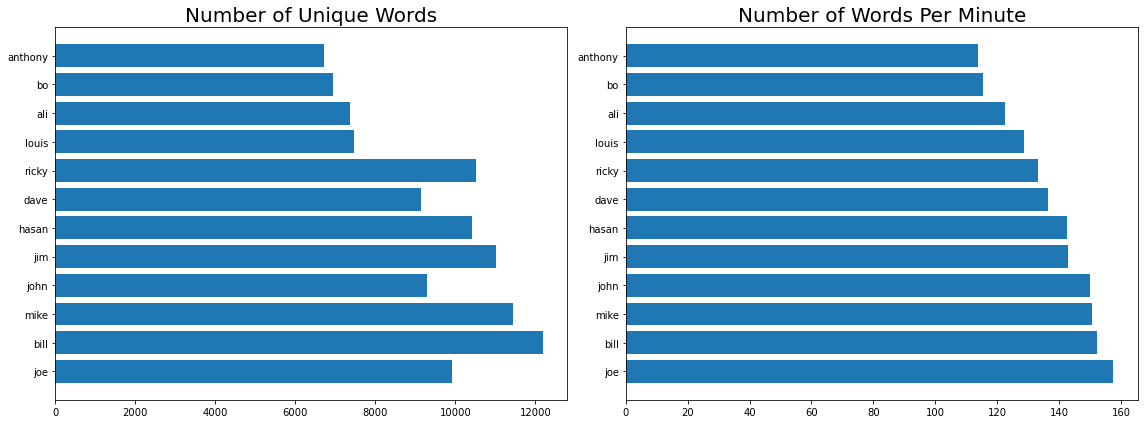

In [34]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.index)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_unique_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_unique_sort.index)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

## TF-IDF

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
transcripts = []
for comedian in clean_data.index:
    transcripts.append(clean_data.loc[comedian, 'transcript'])
vectors = vectorizer.fit_transform(transcripts)
feature_names = vectorizer.get_feature_names()
dense = vectors.toarray()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names, index=clean_data.index)
df

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,abcs,ability,abject,...,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00471,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.004045,0.000000,0.000000,0.000000,0.000000
anthony,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
bill,0.002891,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.002891,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.001785,0.002891,0.002483,0.002891,0.002891,0.000000,0.000000
bo,0.000000,0.005311,0.005311,0.005311,0.000000,0.000000,0.00000,0.000000,0.004561,0.000000,...,0.00000,0.000000,0.00000,0.003279,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
dave,0.000000,0.000000,0.000000,0.000000,0.003791,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
hasan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.00701,0.003505,0.00000,0.002164,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
jim,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
joe,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
john,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003658
louis,0.000000,0.000000,0.000000,0.000000,0.000000,0.014172,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.005834,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
